    1- test function
    2- MC tests

In [1]:
# ! delete the following
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='retina'
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 1- Test functions

In [3]:
from mcrppy.integrand_test_functions import (support_integrands,
                                             f_1, f_2, f_3,
                                             exact_integral_f_1, exact_integral_f_2,
                                             exact_integral_f_3)


In [4]:
nb_function=5
fct_list = [f_1, f_2, f_3]
fct_names = ["f_1", "f_2", "f_3"]
exact_integrals = [exact_integral_f_1, exact_integral_f_2, exact_integral_f_3]
for d in range(2,8):
    exact_integrals = [exact_integral_f_1(d), exact_integral_f_2(d), exact_integral_f_3(d)]
    print("for d={}".format(d))
    i_f = [{name: integ} for name, integ in zip(fct_names, exact_integrals)]
    print("Exact integral functions=", i_f )

for d=2
Exact integral functions= [{'f_1': None}, {'f_2': 0.7853981633974483}, {'f_3': 0}]
for d=3
Exact integral functions= [{'f_1': None}, {'f_2': 0.5235987755982988}, {'f_3': 0}]
for d=4
Exact integral functions= [{'f_1': None}, {'f_2': 0.30842513753404244}, {'f_3': 0}]
for d=5
Exact integral functions= [{'f_1': None}, {'f_2': 0.16449340668482262}, {'f_3': 0}]
for d=6
Exact integral functions= [{'f_1': None}, {'f_2': 0.08074551218828077}, {'f_3': 0}]
for d=7
Exact integral functions= [{'f_1': None}, {'f_2': 0.03691223414321407}, {'f_3': 0}]


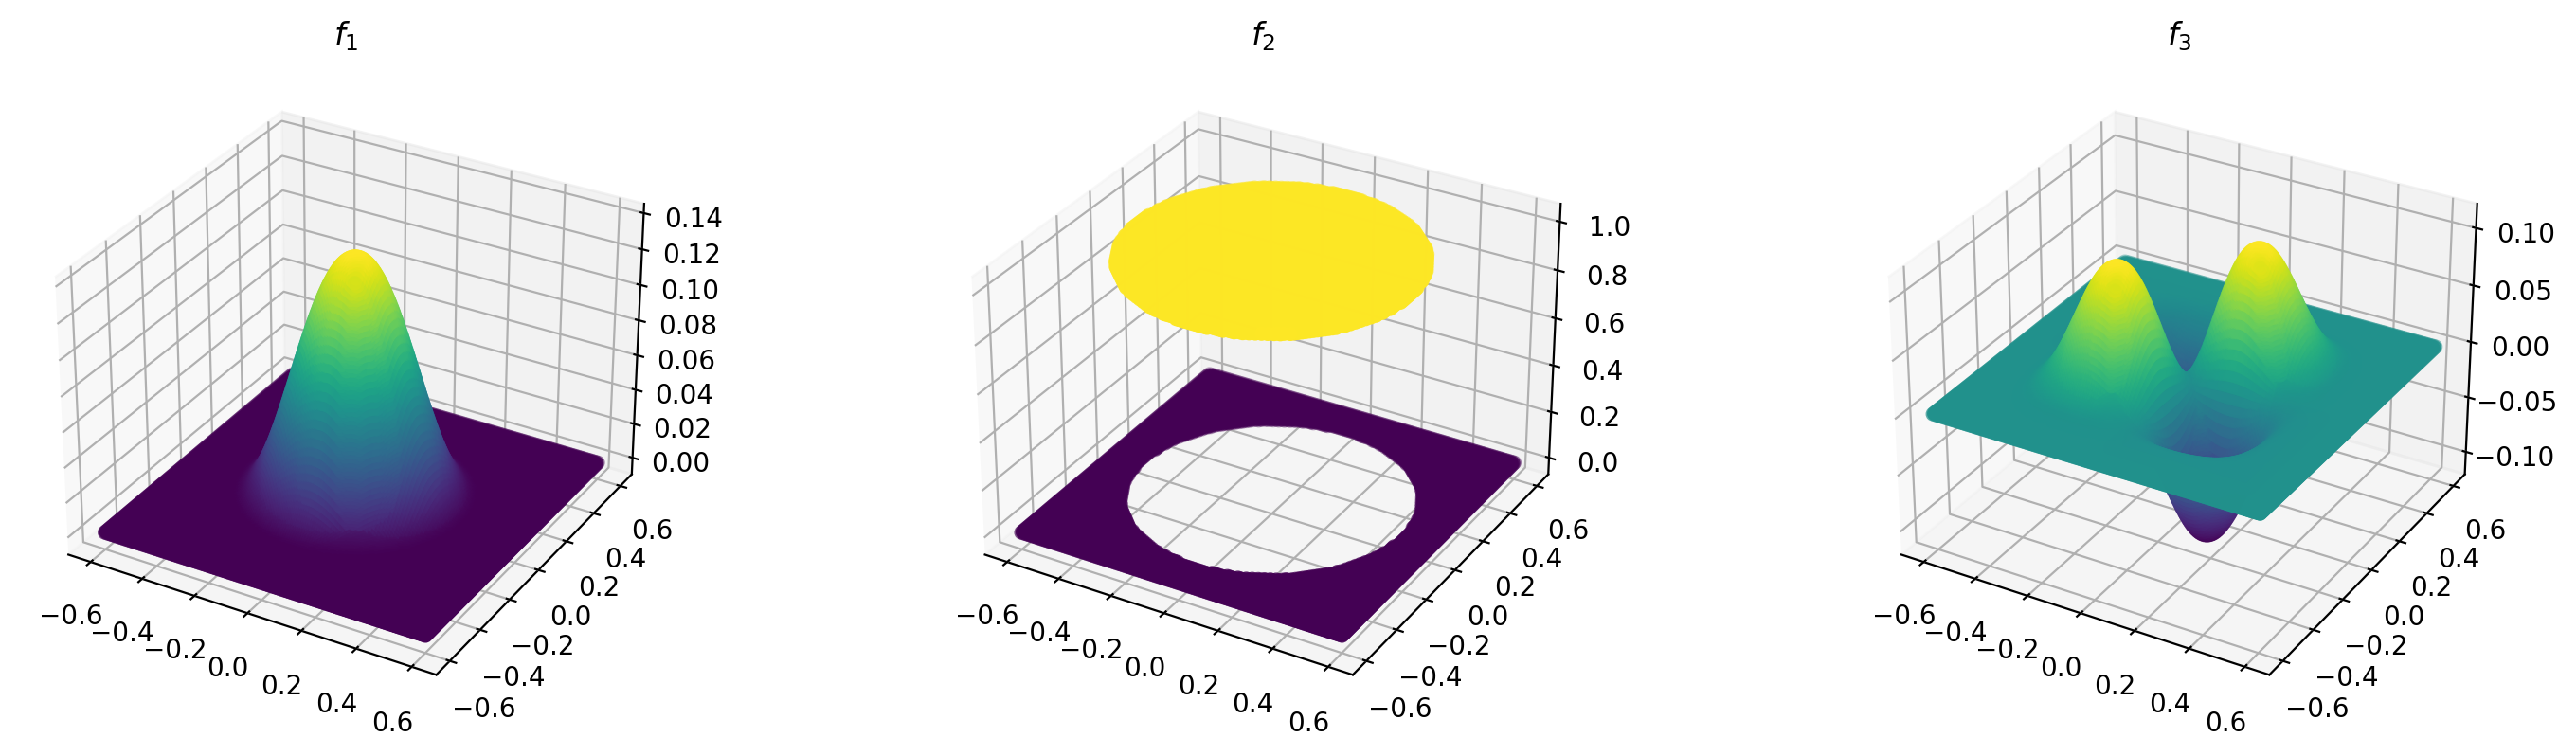

In [5]:
x = np.linspace(-3/5,3/5, 140)
X, Y = np.meshgrid(x, x)
points = np.array([X.ravel(), Y.ravel()]).T
z_f_1 = f_1(points)
z_f_2 = f_2(points)
z_f_3 = f_3(points)
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter3D(X.ravel(), Y.ravel(), z_f_1, c=z_f_1, rasterized=True)
ax.set_title(r"$f_1$")
ax = fig.add_subplot(1, 3, 2, projection='3d')
ax.scatter3D(X.ravel(), Y.ravel(), z_f_2, c=z_f_2, rasterized=True)
ax.set_title(r"$f_2$")
ax = fig.add_subplot(1, 3, 3, projection='3d')
ax.scatter3D(X.ravel(), Y.ravel(), z_f_3, c=z_f_3, rasterized=True)
ax.set_title(r"$f_3$")
plt.tight_layout()
#plt.savefig("linear_stat_used_for_var_comp.pdf")
plt.show()

# 2- MC tests 

In [6]:
from mcrppy.monte_carlo_methods import mc_results, dataframe_error_test, dataframe_mse_results, dataframe_residual_test
from mcrppy.plot_functions import plot_mc_results, qq_plot_residual

In [11]:
nb_samples=100
nb_cores = 3
nb_points_list=np.arange(50, 1025, 25).tolist()
fct_list = [f_1, f_2, f_3]
fct_names = ["f_1", "f_2", "f_3"]
estimators = ["MC", 
              "MCRB",
              "MCCV",
              "RQMC",
              "MCDPP"]
print("Number of tests: ", len(nb_points_list))
print("Number of points to be used:", nb_points_list)
print("Methods to be used:", estimators)

Number of tests:  39
Number of points to be used: [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]
Methods to be used: ['MC', 'MCRB', 'MCCV', 'RQMC', 'MCDPP']


### For d=2

In [12]:
d=2
exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d)]
support_window = support_integrands(d) 

In [13]:
if __name__ == "__main__":
    results_2d, nb_points_2d = mc_results(d, 
                                          nb_points_list=nb_points_list, 
                                          nb_samples=nb_samples,
                                          support_window=support_window,
                                          fct_list=fct_list,
                                          fct_names=fct_names,
                                          exact_integrals=exact_integrals,
                                          estimators=estimators, 
                                          nb_cores=nb_cores,
                                          file_name="mc_results_2d_final.pickle"
                                            )

d= 2 , nb samples= 100 , nb points= [50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975, 1000]
------------------------------------------------
For MCRB
---------------
FOR f_1
std= [0.0023948870852764366]
MSE= NAN
FOR f_2
std= [0.043985628469797027]
MSE= [0.00201696]
FOR f_3
std= [0.0030114206920012986]
MSE= [9.49403936e-06]
For MC
---------------
FOR f_1
std= [0.0044633862313377464]
MSE= NAN
FOR f_2
std= [0.054737646209317786]
MSE= [0.00304033]
FOR f_3
std= [0.005611647808059768]
MSE= [3.15632647e-05]
For MCCV
---------------
Mean proposal theoretical: [0.01978414] Estiamted: 0.0206545795427687
FOR f_1
std= [0.003045012185408998]
MSE= NAN
Mean proposal theoretical: [0.77708432] Estiamted: 0.7919999999999998
FOR f_2
std= [0.032511365513552964]
MSE= [0.00105779]
Mean proposal theoretical: [-0.00056069] Estiamted: -0.0014551264917477265
FOR f_3
std= [0.

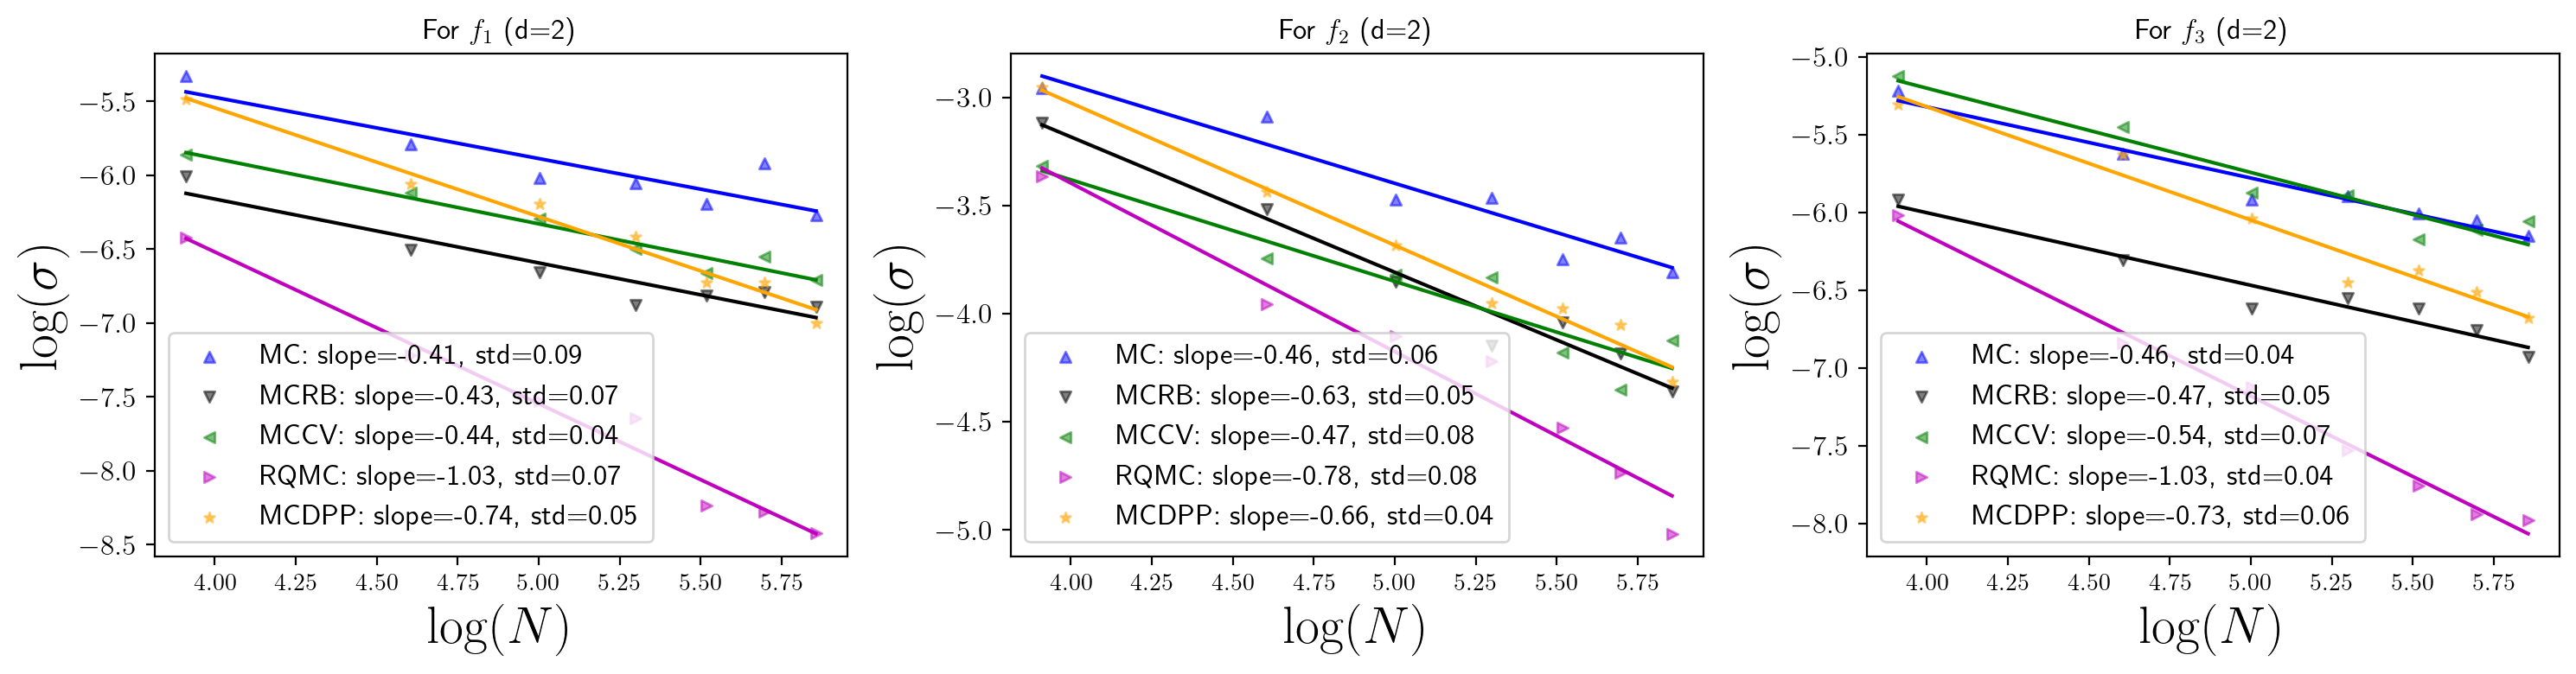

In [23]:
plot_mc_results(d, 
                results_2d, 
                nb_points_2d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False,
                estimators=estimators,
                #save_fig="std_mc_2_d.pdf"
               )

In [25]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=results_2d, 
                        nb_points_list=nb_points_2d, 
                        fct_names=fct_names, 
                        test_type="SW")

Normality test of residuals of the linear regression:


,f_1,f_2,f_3
MC,"(stat=0.854, p=0.133)","(stat=0.939, p=0.633)","(stat=0.830, p=0.0798)"
MCRB,"(stat=0.924, p=0.498)","(stat=0.936, p=0.603)","(stat=0.918, p=0.456)"
MCCV,"(stat=0.979, p=0.955)","(stat=0.952, p=0.752)","(stat=0.923, p=0.492)"
RQMC,"(stat=0.907, p=0.377)","(stat=0.993, p=0.997)","(stat=0.864, p=0.164)"
MCDPP,"(stat=0.847, p=0.114)","(stat=0.947, p=0.7)","(stat=0.940, p=0.639)"


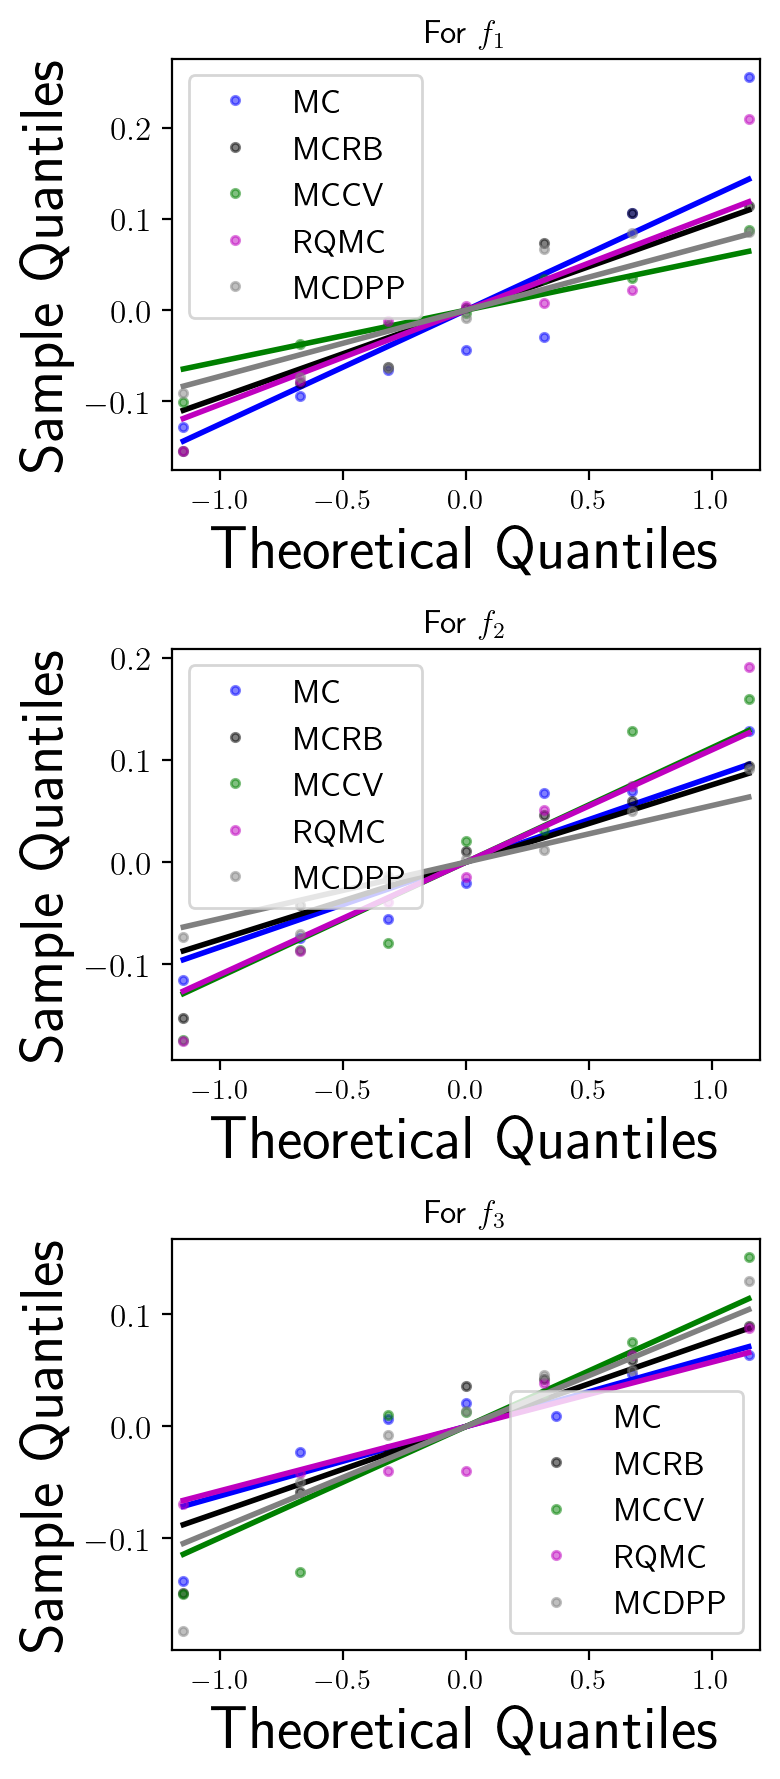

In [26]:
qq_plot_residual(mc_list=results_2d, 
                 nb_points_list=nb_points_2d, 
                 fct_names=fct_names,
                #save_fig="qq_plot_2d.pdf"
                )

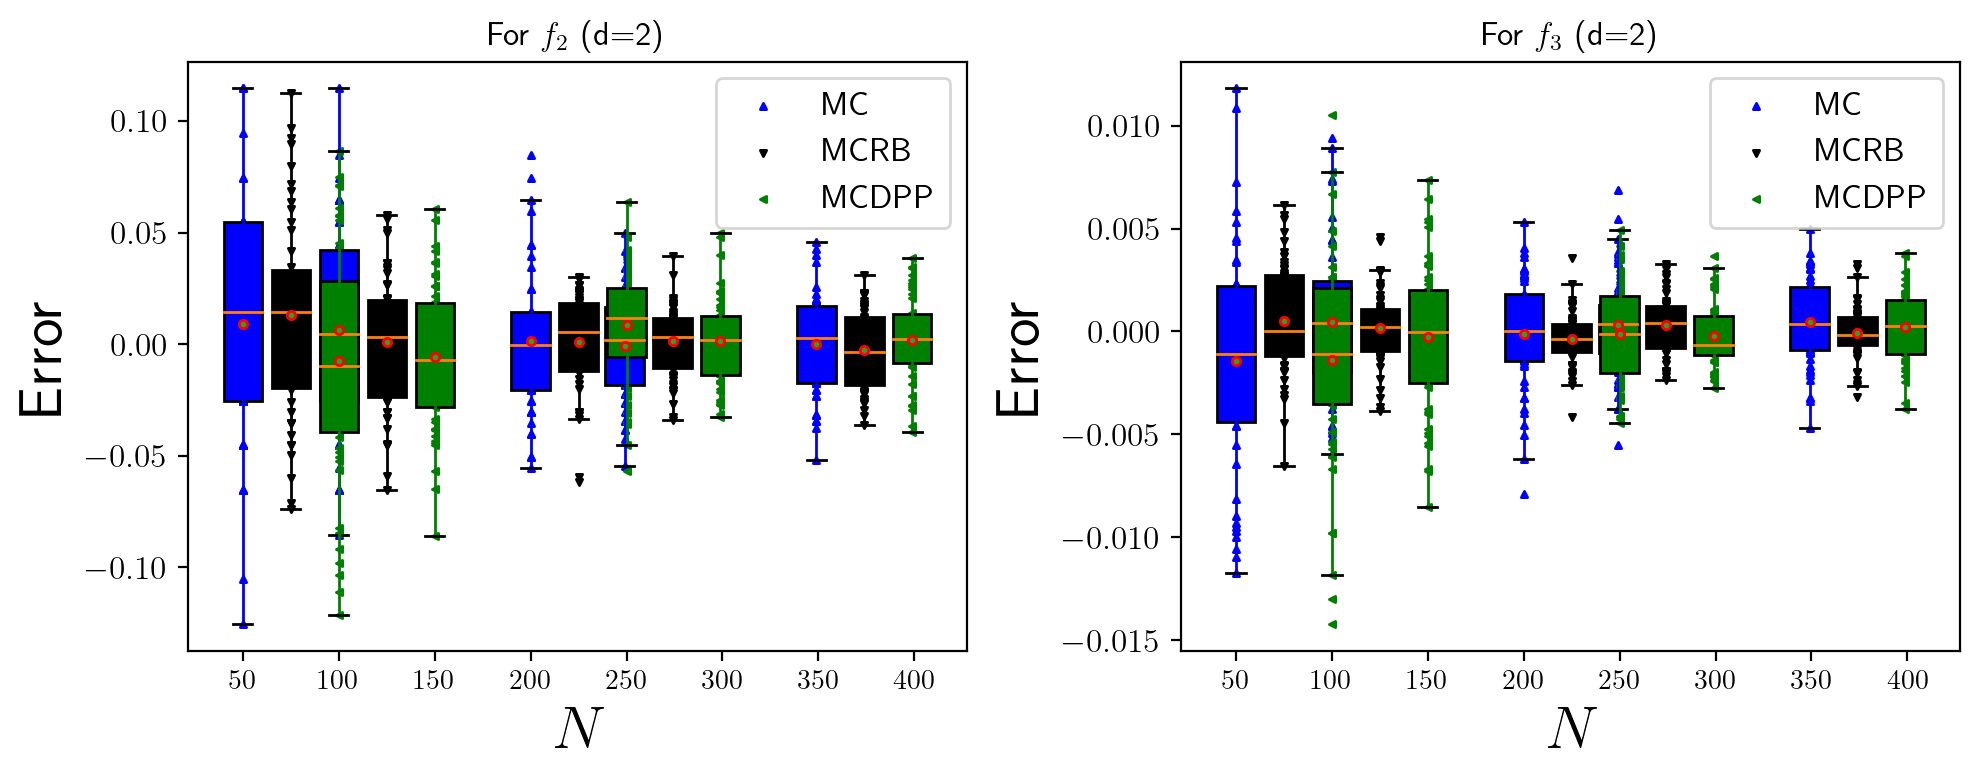

In [33]:
plot_mc_results(d=2, 
                mc_list=results_2d, 
                nb_points_list=nb_points_2d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="Error",
                plot_error=True,
                plot_std=False,
                nb_subsample_nb_points=5,
                estimators=["MC", "MCRB", "MCDPP"],
                #save_fig="square_error_mc_2d.pdf"
               )

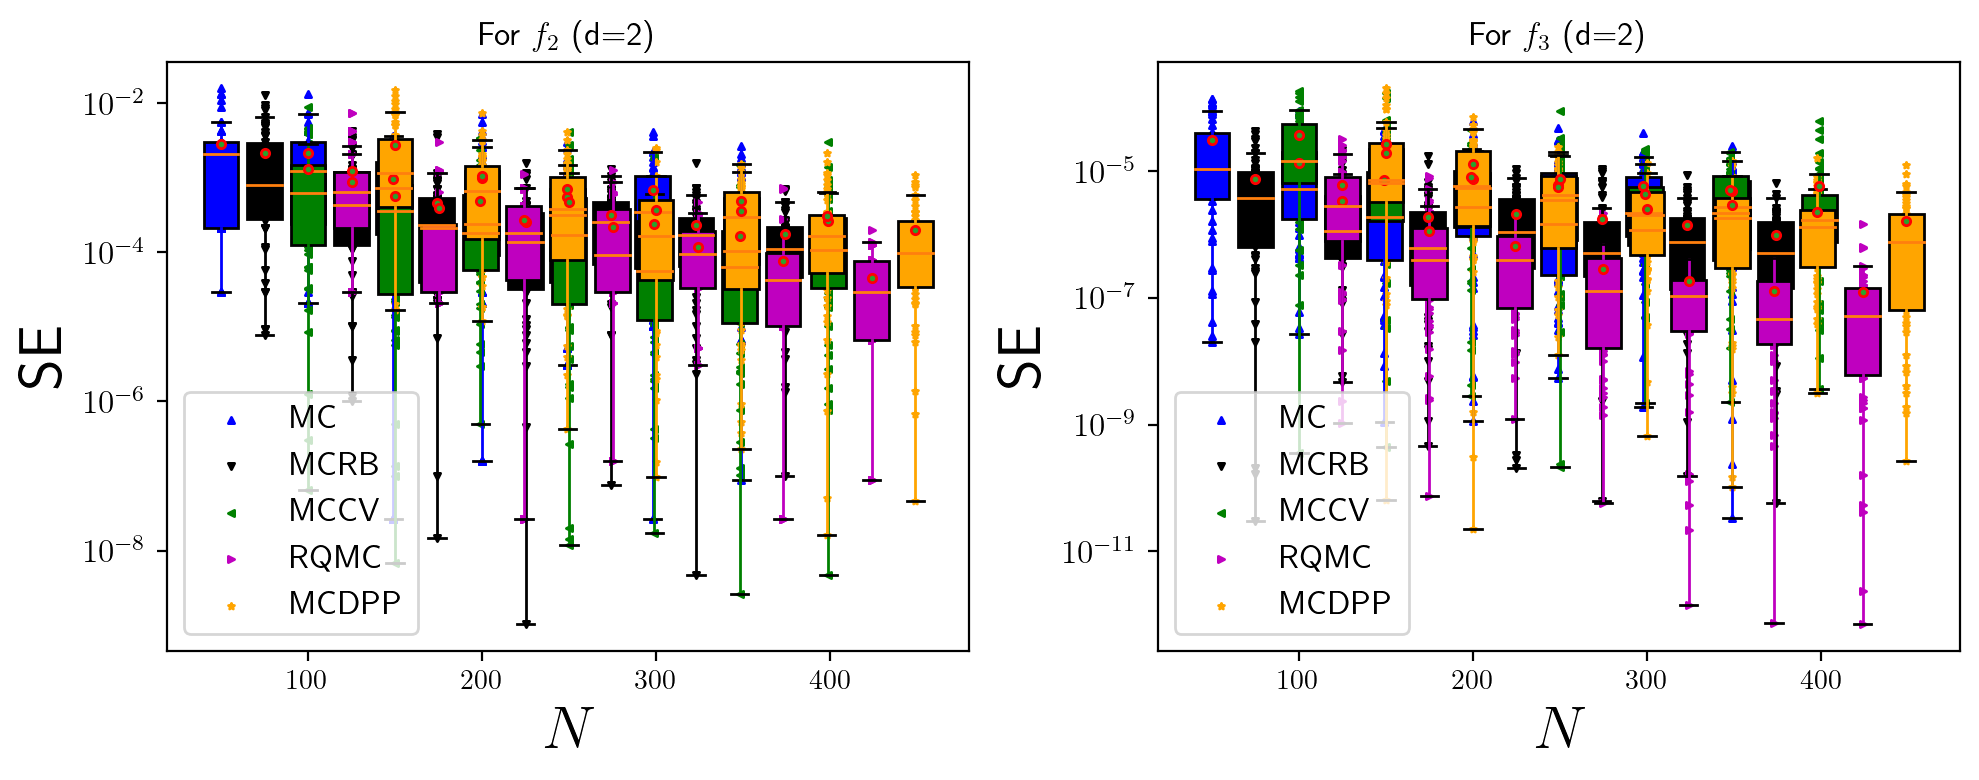

In [30]:
plot_mc_results(d=2, 
                mc_list=results_2d, 
                nb_points_list=nb_points_2d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="SE",
                plot_error=True,
                plot_std=False,
                log_scale=True,
                #nb_subsample_nb_points=5,
                estimators=estimators,
                #save_fig="square_error_mc_2d.pdf"
               )

In [ ]:
if __name__ == "__main__":
    mc_results_2d, nb_point_2d = mc_results(d, 
                                            nb_point_list, 
                                            nb_sample=nb_sample,
                                             support_window=support_window,
                                            fct_list=fct_list,
                                            fct_names=fct_names,
                                            exact_integrals=exact_integrals,
                                            estimators=estimators, 
                                            nb_core=nb_core
                                            #file_name="mc_results_2d.pickle"
                                            )

In [ ]:
dataframe_mse_results(mc_results=mc_results_2d,
                      fct_names=fct_names, 
                      exact_integrals=exact_integrals, 
                      nb_sample=nb_sample)

In [ ]:
#save date
with open('mc_results_2d.pickle', 'wb') as handle:
    pickle.dump(mc_results_2d, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### load saved data

In [ ]:

with open('mc_results_2d.pickle', 'rb') as file:
    mc_results_2d_dict = pickle.load(file)
mc_results_2d_dict.keys()
estimators = ["MC", 
              "MCP",
              "MCCV",
              "RQMC"]
fct_list = [f_1, f_2, f_3, f_4]
fct_names = ["f_1", "f_2", "f_3", "f_4"]

d = mc_results_2d_dict["d"]
nb_point_list = mc_results_2d_dict['nb_point_list']
mc_results_2d = mc_results_2d_dict['mc_result']

#### Variance study

In [ ]:
plot_mc_results(d, mc_results_2d, nb_point_list, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False, 
                save_fig="std_mc_2_d.pdf"
               )

In [ ]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=mc_results_2d, 
                        nb_point_list=nb_point_list, 
                        fct_names=fct_names, 
                        test_type="SW")

In [ ]:
qq_plot_residual(mc_list=mc_results_2d, 
                        nb_point_list=nb_point_list, 
                        fct_names=fct_names,
                save_fig="qq_plot_2d.pdf")

#### Error study

In [ ]:
plot_mc_results(d, mc_results_2d, nb_point_list, 
                fct_list=fct_list, 
                fct_names=fct_names,
                error_type="Error",
                log_scale=False, 
                #save_fig="std_mc_2_d.pdf"
               )

Error

In [ ]:
mc_results_2d.keys()

In [ ]:
fct_list = [f_2, f_3, f_4, f_5]
fct_names = [ "f_2", "f_3", "f_4", "f_5"]


In [ ]:
plot_mc_results(d, mc_results_2d, 
                nb_point_2d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="Error",
                plot_error=True,
                plot_std=False,
                log_scale=False,
                #save_fig="error_mc_2_d.pdf"
               )

In [ ]:
plot_mc_results(d, mc_results_2d, nb_point_list, 
                fct_list=fct_list, 
                fct_names=fct_names,
                error_type="SE",
                plot_error=True,
                plot_std=False,
                log_scale=True,
                #save_fig="error_mc_2_d.pdf"
               )

In [ ]:
for name in fct_names:
    print("For "+ name + ":")
    df_error = dataframe_error_test(mc_results_2d, nb_point_list, 
                     fct_name=name,
                     type_mc_test="MCP")
    display(df_error)

### For d=3

In [ ]:
estimators = ["MC", 
              "MCP",
              "MCCV",
              "MCDPP",
              "RQMC"]

In [ ]:
d=3
exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d), exact_integral_f_4(d), 
                  exact_integral_f_5(d)]
support_window = support_integrands(d) 
if __name__ == "__main__":
    mc_results_3d, nb_point_3d = mc_results(d, 
                                            nb_point_list, 
                                            nb_sample=nb_sample,
                                             support_window=support_window,
                                            fct_list=fct_list,
                                            fct_names=fct_names,
                                            exact_integrals=exact_integrals,
                                            estimators=estimators, 
                                            nb_core=nb_core,
                                            add_r_push=0
                                            #file_name="mc_results_2d.pickle"
                                            )

In [ ]:
for name in fct_names:
    print("For "+ name + ":")
    df_error = dataframe_error_test(mc_results_3d, nb_point_list, 
                     fct_name=name,
                     type_mc_test="MCP")
    display(df_error)

#### variance study

In [ ]:
plot_mc_results(d, mc_results_3d, 
                nb_point_3d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False, 
               )

In [ ]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=mc_results_3d, 
                        nb_point_list=nb_point_3d, 
                        fct_names=fct_names, 
                        test_type="SW")

In [ ]:
qq_plot_residual(mc_list=mc_results_3d, 
                        nb_point_list=nb_point_list, 
                        fct_names=fct_names,
                save_fig="qq_plot_3d.pdf")

#### Error study

In [ ]:
plot_mc_results(d, mc_results_3d, nb_point_list, nb_sample, 
                fct_list=fct_list, 
                fct_names=fct_names,
                error_type="Error",
                plot_error=True,
                plot_std=False,
                log_scale=False,
                #save_fig="mc_2_d.pdf"
               )

In [ ]:
dataframe_error_test(mc_results_3d, nb_point_3d, 
                     fct_name=fct_names,
                     type_mc_test="MCP")

### For d=4

In [ ]:
d=4
exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d),
                  exact_integral_f_3(d), exact_integral_f_4(d), 
                  exact_integral_f_5(d)]
support_window = support_integrands(d) 
if __name__ == "__main__":
    mc_results_4d, nb_point_4d = mc_results(d, 
                                            nb_point_list, 
                                            nb_sample=nb_sample,
                                             support_window=support_window,
                                            fct_list=fct_list,
                                            fct_names=fct_names,
                                            exact_integrals=exact_integrals,
                                            estimators=estimators, 
                                            nb_core=nb_core,
                                            add_r_push=0
                                            #file_name="mc_results_2d.pickle"
                                            )

In [ ]:
dataframe_mse_results(mc_results=mc_results_4d,
                      fct_names=fct_names, 
                      exact_integrals=exact_integrals, 
                      nb_sample=nb_sample)

#### Variance study

In [ ]:
plot_mc_results(d, mc_results_4d, 
                nb_point_4d, 
                fct_list=fct_list, 
                fct_names=fct_names,
                log_scale=False, 
                #save_fig="std_mc_2_d.pdf"
               )

In [ ]:
print("Normality test of residuals of the linear regression:")
dataframe_residual_test(mc_list=mc_results_4d, 
                        nb_point_list=nb_point_list, 
                        fct_names=fct_names, 
                        test_type="SW")

In [ ]:
qq_plot_residual(mc_list=mc_results_4d, 
                        nb_point_list=nb_point_list, 
                        fct_names=fct_names,
                save_fig="qq_plot_4d.pdf")

#### Error study

In [ ]:
plot_mc_results(d=4, 
                mc_list=mc_results_4d, 
                nb_point_list=nb_point_4d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="SE",
                plot_error=True,
                plot_std=False,
                log_scale=True,
                nb_subsample_nb_points=5,
                #save_fig="square_error_mc_2d.pdf"
               )

In [ ]:
plot_mc_results(d=4, 
                mc_list=mc_results_4d, 
                nb_point_list=nb_point_4d, 
                fct_list=fct_list[1:], 
                fct_names=fct_names[1:],
                error_type="Error",
                plot_error=True,
                plot_std=False,
                log_scale=False,
                nb_subsample_nb_points=5,
                #save_fig="square_error_mc_2d.pdf"
               )

In [ ]:
for name in fct_names:
    print("For "+ name + ":")
    df_error = dataframe_error_test(mc_results_4d, nb_point_list, 
                     fct_name=name,
                     type_mc_test="MCP")
    display(df_error)

In [ ]:
len(nb_point_list)

In [ ]:
# accelrating computational time by reducing the points used to push in B(0,R) from B(0, 2R)
# into B(0, R + add_r_push)
if __name__ == "__main__":
    mc_results_4d, nb_point_4d = mc_results(d, nb_point_list, nb_sample=nb_sample,
                                             support_window=support_window,
                                            fct_list=fct_list,
                                            fct_names=fct_names,
                                            exact_integrals=exact_integrals,
                                            estimators=estimators, 
                                            core_number=nb_core, 
                                           add_r_push=0.2)


In [ ]:
dataframe_mse_results(mc_results=mc_results_4d,
                      fct_names=fct_names, 
                      exact_integrals=exact_integrals, 
                      nb_sample=nb_sample)

In [1]:
import numpy as np
# to delete this cell
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

%config InlineBackend.figure_format='retina'
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

import warnings
warnings.filterwarnings('ignore')

In [2]:
from GPPY.monte_carlo_tests_setup import mc_results

from GPPY.monte_carlo_test_functions import (f_1, f_2, 
                                             exact_integral_f_1, exact_integral_f_2,
                                             support_integrands)


In [4]:
nb_sample=30
nb_point_list=np.arange(500, 600, 50).tolist()
print(len(nb_point_list), nb_point_list)
fct_list = [f_1, f_2]
fct_names = ["f_1", "f_2"]
estimators = ["MC", 
              "MCP",
              "MCDPP"]
d=2
exact_integrals= [exact_integral_f_1(d), 
                  exact_integral_f_2(d)]
support_window = support_integrands(d) 
if __name__ == "__main__":
    mc_results_2d, nb_point_2d = mc_results(d, 
                                            nb_point_list, 
                                            nb_sample=nb_sample,
                                             support_window=support_window,
                                            fct_list=fct_list,
                                            fct_names=fct_names,
                                            exact_integrals=exact_integrals,
                                            estimators=estimators, 
                                            nb_core=3,
                                            add_r_push=0,
                                            #file_name="mc_results_2d.pickle"
                                            )

2 [500, 550]
d= 2 , nb points simu= [500, 550] , nb samples= 30
------------------------------------------------
N Big= 785 , N expected = 500 , Epsilon= 0.00015923566878980896
Time Push= 0 min 3.3363890647888184 s
For MCP
---------------
FOR f_1
std= [0.000647314491555619]
MSE= NAN
FOR f_2
std= [0.011057882005670951]
MSE= [0.00012276]
For MC
---------------
FOR f_1
std= [0.0013470912938756724]
MSE= NAN
FOR f_2
std= [0.017052041845771214]
MSE= [0.00030327]
Number of processes in the DPP pool  3
Number of CPU cores:  8
Number of CPU cores currently in use:  8
For MCDPP
---------------
FOR f_1
std= [0.0008951017544137951]
MSE= NAN
FOR f_2
std= [0.012199682568801357]
MSE= [0.00015113]
----------------------------------------------
N expected= 500 , N obtained 497
Time = {'MC': [0, 0.003957033157348633], 'MCP': [0, 3.3366057872772217], 'MCDPP': [0, 47.09636306762695]}
----------------------------------------------
N Big= 863 , N expected = 550 , Epsilon= 0.00014484356894553884
Time Push= 0

In [ ]:
estimate_control_variate_parameter(points, f_2, )